# Sales and Profit Analysis Of Mackey's Superstore Data


This exploratory data analysis aims to recommend solutions for a fictitious superstore called Mackey's. 

Mackey's Superstore has reached out to me with the following objectives:
* Optimize pricing strategies to maintain or improve **profit margins** without sacrificing demand.
* Use Insights from **high-margin products** to expand into new markets where demand exists.
* Identify **customer segments** that generate the **highest profits** and tailor marketing efforts accordingly.
* Identify the **regions** with the highest and lowest number of **orders**, **regions** with the **highest** and **lowest** profits.

I'll break the analysis process down according to the business objectives for better clarification:
* **First**: Discover what category and sub-categories hold high and low-profit margins. What sub-categories are bringing in the most profit? Which sub-category is bringing in the least?
* **Second**: Identify the customer segments generating the highest profits.
* **Third**: Identify what region of the United States brought in the most profit.

First, I'll load necessary packages for cleaning, manipulation and visualization.

In [4]:
# Loads the tidyverse package
library(tidyverse)
# loads the dplyr package for data manipulation
library(dplyr)
# loads the ggplot2 package for data visualization
library(ggplot2)
# loads the luubridate package for updating dates and times
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Next, I loaded the table into the variable "superstore_data".

In [5]:
#stores the datset under the variable "superstore_data"
superstore_data <- read.csv("/kaggle/input/superstore-dataset-final/Sample - Superstore.csv")


I'll preview the first few rows to ensure all the required data for the analysis is present.

In [6]:
#previews the first few rows of the table.
head(superstore_data)


,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Country,City,⋯,Postal.Code,Region,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
1,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,⋯,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,⋯,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
3,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,⋯,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
4,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,⋯,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,⋯,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
6,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,⋯,90032,West,FUR-FU-10001487,Furniture,Furnishings,"Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood",48.8600,7,0.00,14.1694


I'll check for null values in the table.

In [7]:
# Counts the number of null values present in the table.
sum(is.na(superstore_data))

[1] 0

I checked the data structure of the table to ensure every column is in the right format.

In [8]:
# Checks the data structure of the table. I did this to check if every column is in the right format.
str(superstore_data)


'data.frame':	9994 obs. of  21 variables:
 $ Row.ID       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Order.ID     : chr  "CA-2016-152156" "CA-2016-152156" "CA-2016-138688" "US-2015-108966" ...
 $ Order.Date   : chr  "11/8/2016" "11/8/2016" "6/12/2016" "10/11/2015" ...
 $ Ship.Date    : chr  "11/11/2016" "11/11/2016" "6/16/2016" "10/18/2015" ...
 $ Ship.Mode    : chr  "Second Class" "Second Class" "Second Class" "Standard Class" ...
 $ Customer.ID  : chr  "CG-12520" "CG-12520" "DV-13045" "SO-20335" ...
 $ Customer.Name: chr  "Claire Gute" "Claire Gute" "Darrin Van Huff" "Sean O'Donnell" ...
 $ Segment      : chr  "Consumer" "Consumer" "Corporate" "Consumer" ...
 $ Country      : chr  "United States" "United States" "United States" "United States" ...
 $ City         : chr  "Henderson" "Henderson" "Los Angeles" "Fort Lauderdale" ...
 $ State        : chr  "Kentucky" "Kentucky" "California" "Florida" ...
 $ Postal.Code  : int  42420 42420 90036 33311 33311 90032 90032 90032 90032 90032 ...
 $ Reg

I calculated the profit percentage for each category to deduce which category had the highest profit percentage and stored it under the variable "profit_percentage_category".

In [9]:
# Calculates the profit percentage for every category under the variable "profit_percentage_category"
profit_percentage_category <- superstore_data %>% group_by(Category) %>%summarise(Total_Profit = sum(Profit, na.rm = TRUE)) %>% mutate(Profit_Percentage = (Total_Profit/sum(Total_Profit) * 100))

I previewed the variable "profit_percentage_category" to make sure there weren't any errors.

In [10]:
#Previews the variable "profit_percentage_category"
print(profit_percentage_category)

# A tibble: 3 × 3
  Category        Total_Profit Profit_Percentage
  <chr>                  <dbl>             <dbl>
1 Furniture             18451.              6.44
2 Office Supplies      122491.             42.8 
3 Technology           145455.             50.8 


Next, I visualized the profit percentage by category as a pie chart.

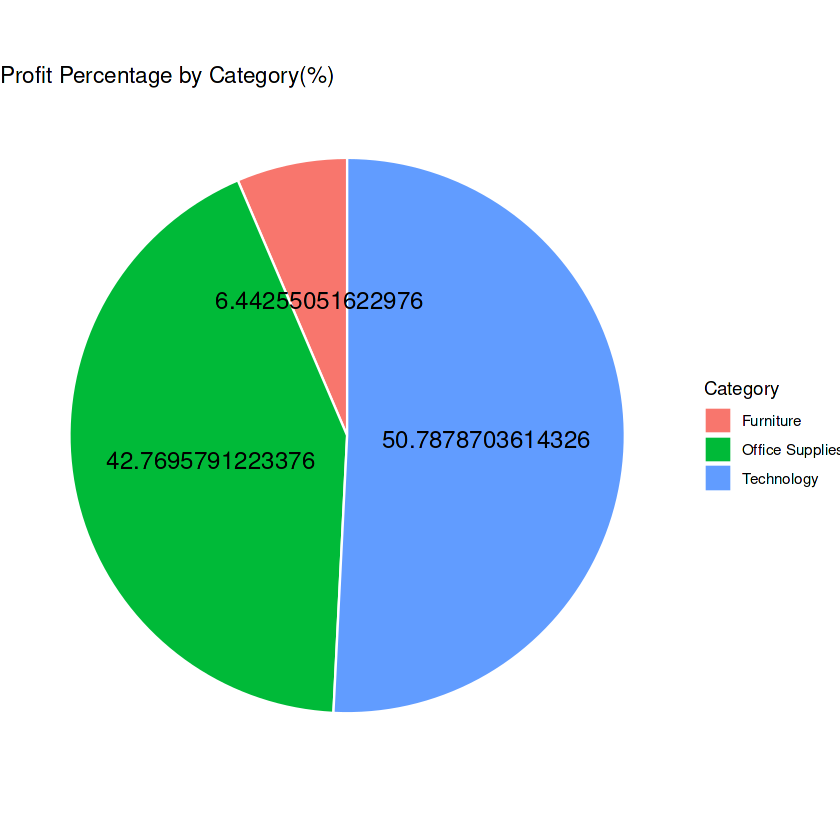

In [11]:
# Visualizes "profit_percetage_category" as a Pie Chart.
ggplot(profit_percentage_category, aes(x = "", y = Profit_Percentage, fill = Category)) + 
  geom_bar(stat = "identity", width = 1, color = "white") + 
  coord_polar("y", start = 0) + 
  theme_void() + 
  labs(title = "Profit Percentage by Category(%)", fill = "Category") + geom_text(aes(label = Profit_Percentage), 
            position = position_stack(vjust = 0.5), 
            color = "black", size = 5) 

As we can deduce from the above diagram, the category with the highest profit percentage is the "Technology" Category. 

I calculated the profit margin for each subcategory, using the formula : Total Profit / Total Sales x 100 

In [12]:
#Calculates the profit margin for each sub-category and stores it under the variable "profit_margin_sub_category"
profit_margin_sub_category <- superstore_data %>% group_by(Sub.Category) %>% summarise(Total_Profit = sum(Profit, na.rm = TRUE), Total_Sales = sum(Sales, na.rm = TRUE))%>% mutate(Profit_Margin = (Total_Profit/(Total_Sales) * 100))

In [13]:
# Views the first few rows of the variable "profit_margin_sub_category"
head(profit_margin_sub_category)

Sub.Category,Total_Profit,Total_Sales,Profit_Margin
<chr>,<dbl>,<dbl>,<dbl>
Accessories,41936.636,167380.32,25.054700
Appliances,18138.005,107532.16,16.867517
Art,6527.787,27118.79,24.071083
Binders,30221.763,203412.73,14.857361
Bookcases,-3472.556,114880.00,-3.022768
Chairs,26590.166,328449.10,8.095673


In [14]:
#Previews the variable "profit_margin_sub_category"
print(profit_margin_sub_category)

# A tibble: 17 × 4
   Sub.Category Total_Profit Total_Sales Profit_Margin
   <chr>               <dbl>       <dbl>         <dbl>
 1 Accessories        41937.     167380.         25.1 
 2 Appliances         18138.     107532.         16.9 
 3 Art                 6528.      27119.         24.1 
 4 Binders            30222.     203413.         14.9 
 5 Bookcases          -3473.     114880.         -3.02
 6 Chairs             26590.     328449.          8.10
 7 Copiers            55618.     149528.         37.2 
 8 Envelopes           6964.      16476.         42.3 
 9 Fasteners            950.       3024.         31.4 
10 Furnishings        13059.      91705.         14.2 
11 Labels              5546.      12486.         44.4 
12 Machines            3385.     189239.          1.79
13 Paper              34054.      78479.         43.4 
14 Phones             44516.     330007.         13.5 
15 Storage            21279.     223844.          9.51
16 Supplies           -1189.      46674.      

As we can deduce from the table above, the sub-category with the **highest profit margin** is **"Labels"** at **44.4%** while the sub-category with the **least profit margin** is **"Tables"** at **-8.56%**.

For better representation, I visualized the **profit margin per sub category** as a bar chart using the ggplot package.

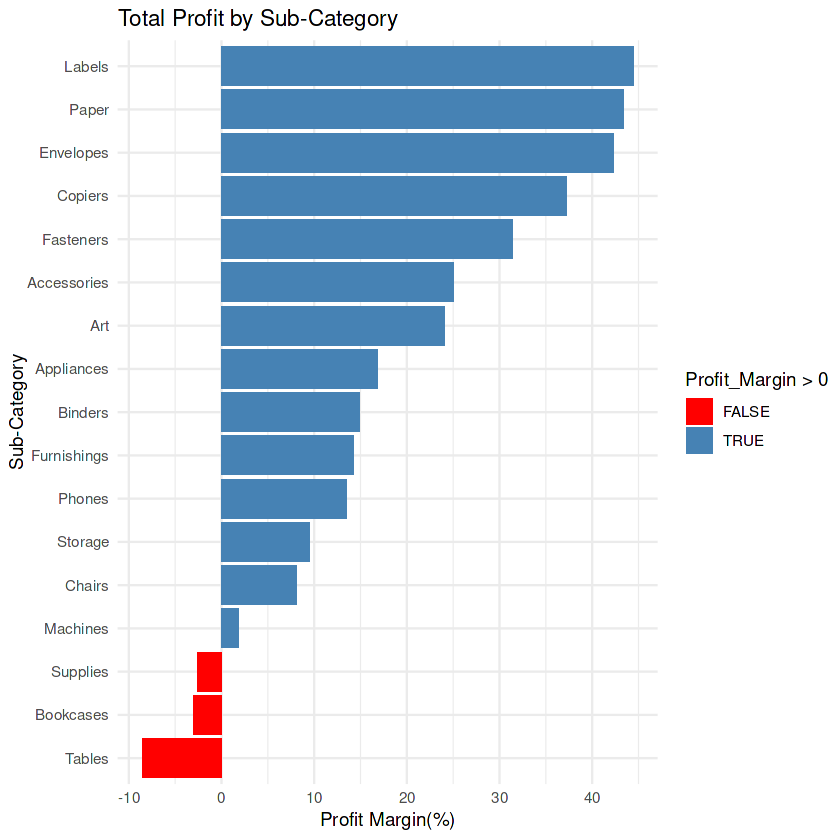

In [15]:
# Visualizes the profit margin for each sub category as a bar chart.
ggplot(profit_margin_sub_category, aes(x = reorder(Sub.Category, Profit_Margin), y = Profit_Margin, fill = Profit_Margin > 0)) +
  geom_bar(stat = "identity") +
  coord_flip() +  
  scale_fill_manual(values = c("red", "steelblue")) + 
  labs(title = "Total Profit by Sub-Category",
       x = "Sub-Category", 
       y = "Profit Margin(%)") +
  theme_minimal()

Next, I calculated the total profit of every customer Segment: **Consumer**, **Corporate** and **Home Office**.

In [16]:
#Calculates the total Profit for each customer segment and stores it under the variable "profit_customer_segment"
profit_customer_segment <- superstore_data %>% group_by(Segment) %>% summarise(Total_Profit = sum(Profit, na.rm = TRUE)) 

In [17]:
#Previews the variable "profit_customer_segment"
print(profit_customer_segment)

# A tibble: 3 × 2
  Segment     Total_Profit
  <chr>              <dbl>
1 Consumer         134119.
2 Corporate         91979.
3 Home Office       60299.


From the table above, It was deduced that the customer segment that brought in the most profit was the **Consumer Segment**.

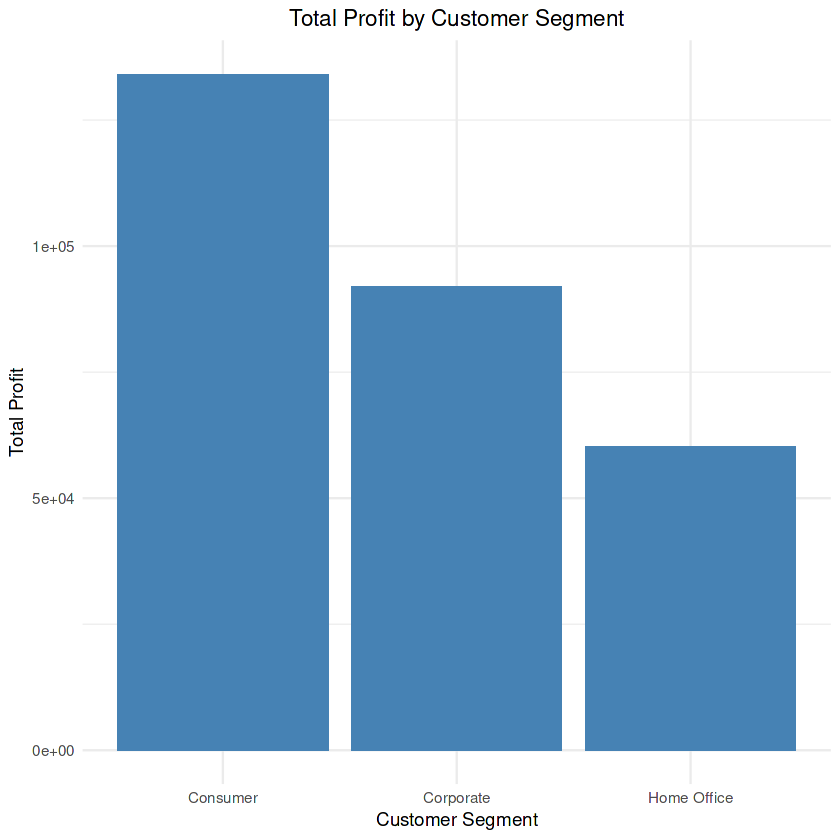

In [18]:
#Visualizes the variable "profit_customer_segment" as a column chart. 
ggplot(profit_customer_segment, aes(x = Segment,  y = Total_Profit)) + geom_bar(stat = "identity", fill = "steelblue") + labs(title = "Total Profit by Customer Segment", x = "Customer Segment", y = "Total Profit") + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

I calculated the total profit and number of orders for each region. Then, I stored it under the dataframe "profit_and_orders_per_region"

In [46]:
#Preview the profit and orders per region
print(profit_and_orders_per_region)

# A tibble: 4 × 3
  Region  Total_Profit Total_Orders
  <chr>          <dbl>        <int>
1 Central       39706.         8780
2 East          91523.        10618
3 South         46749.         6209
4 West         108418.        12266


From the table above, I was able to deduce the Region that brought in the most profit as well as the highest number of orders is the **Western Region**. 

The Region that brought in the least profit as well as the least number of orders is the **Western Region**.

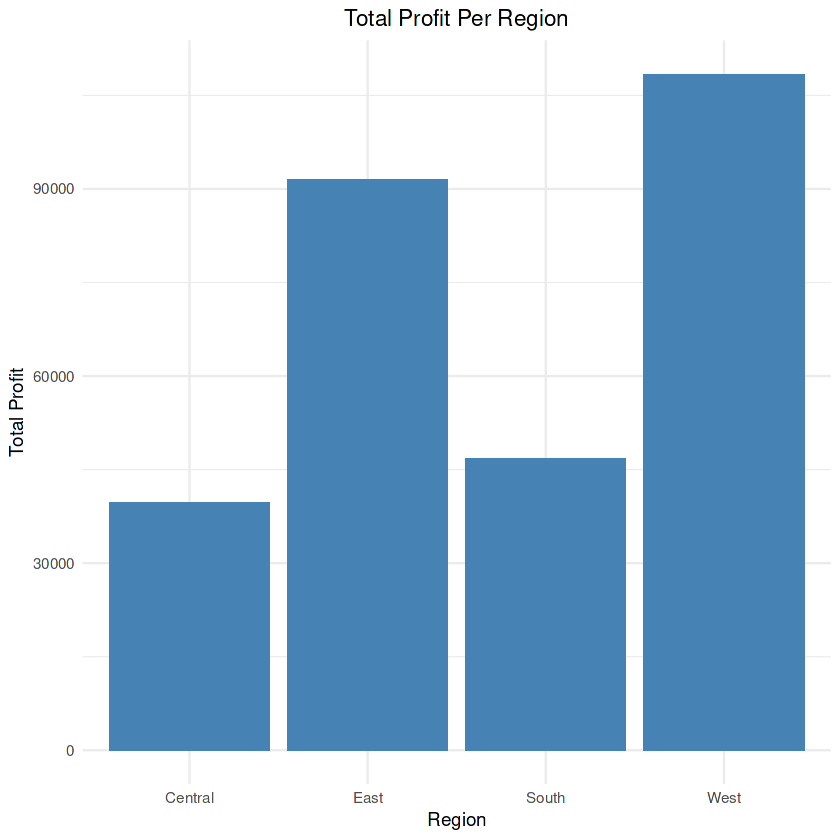

In [22]:
#plots a column chart of total profit by region
ggplot(profit_per_region, aes(x = Region, y = Total_Profit)) + geom_bar(stat = "identity", fill = "steelblue") + labs(title = "Total Profit Per Region", x = "Region", y = "Total Profit") + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

We can deduce from the column chart above that the region bringing in the highest profit is the **West**.

To recap on **Mackey's** Superstore Objectives:

**First**: Discover what category and sub-categories hold high and low-profit margins. What sub-categories are bringing in the most profit? Which sub-category is bringing in the least?
**Analysis Result**: The **Labels** sub-category holds the highest profit margin at 44.4% and the **Bookcases** sub-category holds the least profit at -8.56%.
**Recomendation**: Restructure products from the **Bookcases** sub-category to improve profitability.

**Second**: Identify Customer segments generating the highest profits.
**Analysis Result**: The **Customer Segment** that brought in the most profit was the **Consumer** Segment.
**Recommendation**: Tailor marketing strategies to Consumer Segment to increase profitability. 


**Third**: Identify the **Regions** with the highest and lowest number of orders, **most profitable and least profitable** regions.
**Analysis Result**: The region with the highest number of orders is the **West** and the least is the **South**. The **most profitable region** is also the **West** and the **least profitable region** is also the **South**. Why?

Is it possible that the number of orders are a huge factor to profitability?

I checked to see if there's a correlation between the number of orders and profit.



In [45]:
# Total Profit and Number of Orders per region
profit_and_orders_per_region <- superstore_data %>% group_by(Region) %>% summarise(Total_Profit = sum(Profit, na.rm = TRUE), Total_Orders = sum(Quantity, na.rm = TRUE)) 

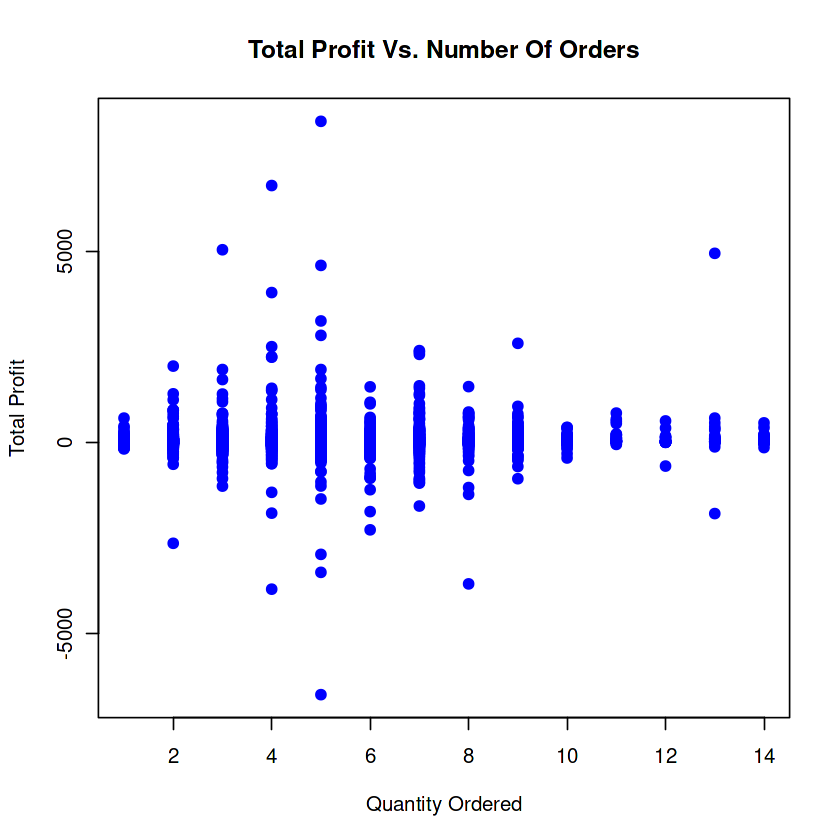

In [41]:
#scatterplot to check for correlation between total profit and number of orders 
plot(superstore_data$Quantity, superstore_data$Profit,
     main = "Total Profit Vs. Number Of Orders",
     xlab = "Quantity Ordered", 
     ylab = "Total Profit", 
     pch = 19, col = "blue") 

From the scatterplot above, it can be deduced that there is no significant correlation between the total profit and number of orders. The points are randomly dispersed and do not follow a trend in an upward or downward direction. 

To further support this, I calculated the correlation coefficient.
A **perfect** positive correlation -> **+1**.
A **strong** positive correlation -> **0.7** to **1**.
A **moderate** positive correlation -> **0.3** to **0.7**.
A **weak** positive correlation -> **0** to **0.3**.

Quantifying the correlation coefficient:

In [39]:
cor(superstore_data$Quantity, superstore_data$Profit, use = "complete.obs")



[1] 0.06625319

In conclusion, the number of orders does not have a significant correlation to profit.
**Recommendation**: Optimize pricing and marketing strategies in the Southern Region and tailor marketing strategies in the West to increase profitability.

**Thank you for your time!**